For project 7, the distribution plots are below. I am putting this as continuation from project 6.

In [1]:
import pandas as pd
c=pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
c.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [11]:
import pandas as pd
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv", parse_dates = ['date'])
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [15]:
df1 = df
df1['date'] = pd.to_datetime(df1['date'])
df1['date'] = df1['date'].dt.strftime('%m/%d/%Y')
df1 = df1.fillna('-')
df1.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,02/24/2020,1,1,-,-,-,-,...,1803.99,-,597.029,9.59,-,-,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,02/25/2020,1,0,-,-,-,-,...,1803.99,-,597.029,9.59,-,-,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,02/26/2020,1,0,-,-,-,-,...,1803.99,-,597.029,9.59,-,-,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,02/27/2020,1,0,-,-,-,-,...,1803.99,-,597.029,9.59,-,-,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,02/28/2020,1,0,-,-,-,-,...,1803.99,-,597.029,9.59,-,-,37.746,0.5,64.83,0.511


In [16]:

#Active cases around the world
top = df[df['date'] == df['date'].max()]
world = top.groupby('location')['total_cases','new_cases','total_deaths', 'new_deaths'].sum().reset_index()
world.head()

,location,total_cases,new_cases,total_deaths,new_deaths
0,Afghanistan,51526.0,121.0,2191.0,10.0
1,Africa,2760459.0,29789.0,65468.0,699.0
2,Albania,58316.0,589.0,1181.0,7.0
3,Algeria,99610.0,299.0,2756.0,5.0
4,Andorra,8049.0,66.0,84.0,0.0


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

top = df[df['date'] == df['date'].max()]
top_casualities = top.groupby(by = 'location')['total_deaths'].sum().sort_values(ascending = False).head(20).reset_index()
top_casualities.head()

,location,total_deaths
0,World,1824748.0
1,Europe,545487.0
2,North America,512770.0
3,European Union,370650.0
4,South America,362651.0


[Text(0, 0.5, 'Location'), Text(0.5, 0, 'Total Deaths')]

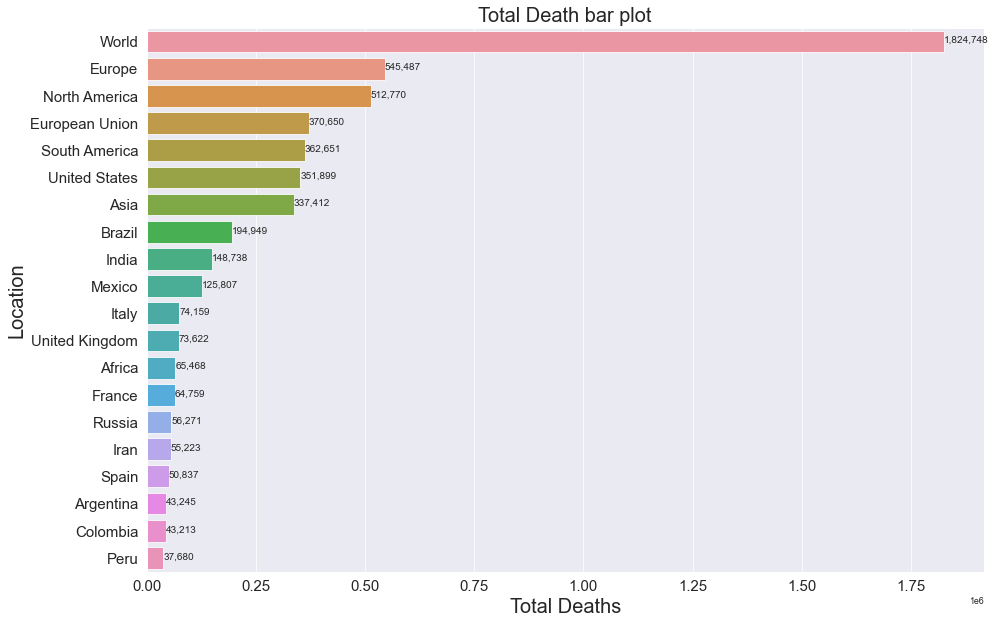

In [40]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total deaths",fontsize = 20)
plt.ylabel('location',fontsize = 20)
plt.title("Total Death bar plot" , fontsize = 20)
ax = sns.barplot(x = top_casualities.total_deaths, y = top_casualities.location)
for i, (value, name) in enumerate(zip(top_casualities.total_deaths,top_casualities.location)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total Deaths', ylabel='Location')

In [ ]:
"""So we can see that Europe Continent have the most death cases, and based on countries United States
have most death cases which surpasses continent Asia"""

[Text(0, 0.5, 'Location'), Text(0.5, 0, 'Total Cases')]

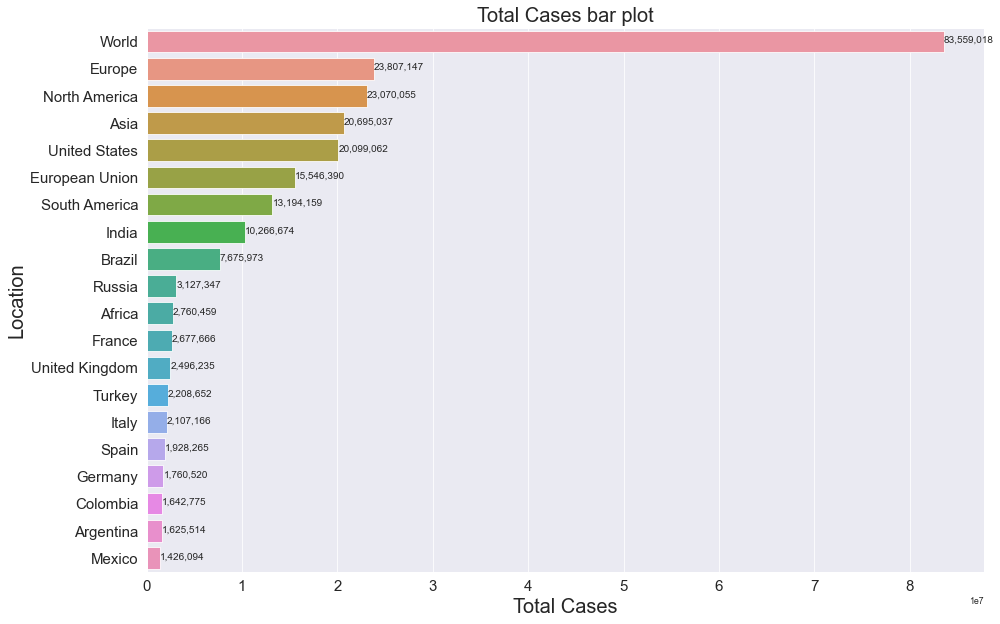

In [42]:
#top = df[df['date'] == df['date'].max()]
top_cases = top.groupby(by = 'location')['total_cases'].sum().sort_values(ascending = False).head(20).reset_index()

plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 20)
plt.ylabel('location',fontsize = 20)
plt.title("Total Cases bar plot" , fontsize = 20)
ax = sns.barplot(x = top_cases.total_cases, y = top_cases.location)
for i, (value, name) in enumerate(zip(top_cases.total_cases,top_cases.location)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total Cases', ylabel='Location')

In [ ]:
"""Total cases are always dominant in USA and the European nations had most total covid cases and also deaths."""

[Text(0, 0.5, 'Location'), Text(0.5, 0, 'Total Vaccinations')]

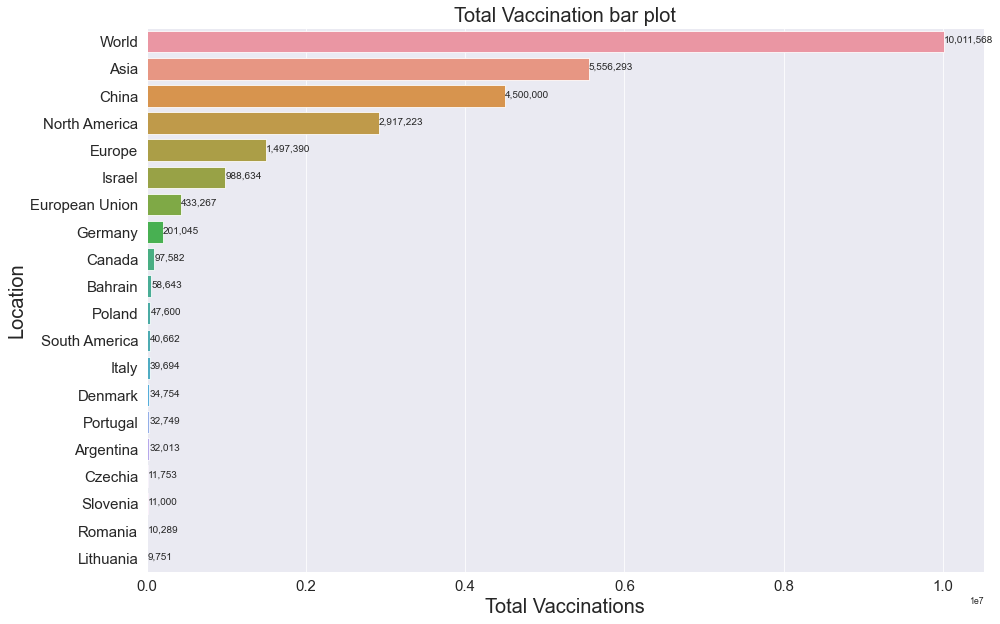

In [44]:
top_vaccine = top.groupby(by = 'location')['total_vaccinations'].sum().sort_values(ascending = False).head(20).reset_index()

plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total vaccinations",fontsize = 20)
plt.ylabel('location',fontsize = 20)
plt.title("Total Vaccination bar plot" , fontsize = 20)
ax = sns.barplot(x = top_vaccine.total_vaccinations, y = top_vaccine.location)
for i, (value, name) in enumerate(zip(top_vaccine.total_vaccinations,top_vaccine.location)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total Vaccinations', ylabel='Location')

In [ ]:
"""Interms of total vaccinations, we can see that Israel have the most total vaccinations followed by Germany."""

Now as this a very big data we will focus on the dataset of united states. As a result we will filter out all other data

In [3]:
#Time series plot for USA
dat_USA = c[c['iso_code']=="USA"]
dat_USA.shape
dat_USA.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
74357,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
74358,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
74359,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
74360,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
74361,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


In [30]:
#We will convert date to index for variations with time
dat_USA['date'] = pd.to_datetime(dat_USA['date'], utc=True)
dat_USA_index = dat_USA.set_index('date')
dat_USA_index.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22 00:00:00+00:00,USA,North America,United States,1.0,NaN,NaN,NaN,NaN,NaN,0.003,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2020-01-23 00:00:00+00:00,USA,North America,United States,1.0,0.0,NaN,NaN,NaN,NaN,0.003,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2020-01-24 00:00:00+00:00,USA,North America,United States,2.0,1.0,NaN,NaN,NaN,NaN,0.006,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2020-01-25 00:00:00+00:00,USA,North America,United States,2.0,0.0,NaN,NaN,NaN,NaN,0.006,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
2020-01-26 00:00:00+00:00,USA,North America,United States,5.0,3.0,NaN,NaN,NaN,NaN,0.015,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


Now we will plot the distribution plot.

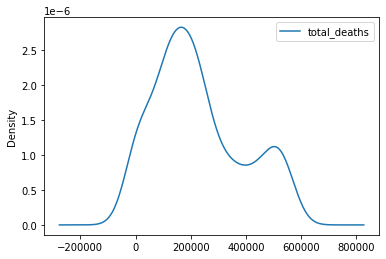

In [96]:
dat_USA_index.plot.density(x='total_cases', y='total_deaths')

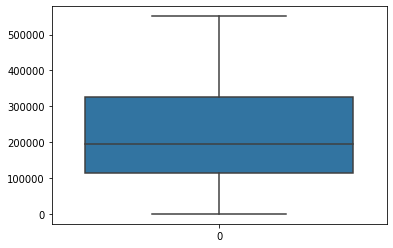

In [98]:
sns.boxplot(data = dat_USA_index['total_deaths'])

We can see that the median of the total_deaths is closer to the 1st quartile suggesting positive skewness. 

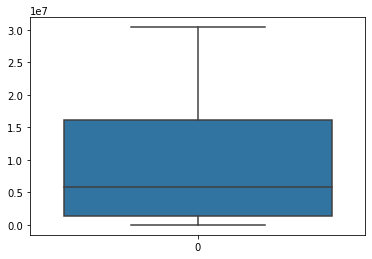

In [102]:
sns.boxplot(data = dat_USA_index['total_cases'])

We can see that the median of the total_cases is closer to the 1st quartile suggesting positive skewness. 

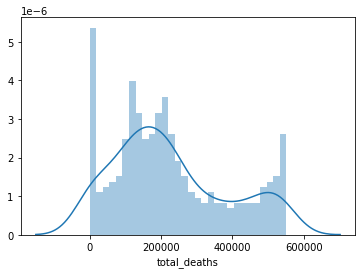

In [101]:
sns.distplot(dat_USA_index['total_deaths'], bins=30)

In [ ]:
From the distribution plot of total_deaths we can see that the distribution have two modes, we can call it a
bimodal distribution. 

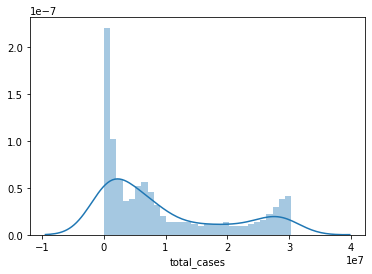

In [103]:
sns.distplot(dat_USA_index['total_cases'], bins=30)

From the distribution plot of total_cases we can see that the distribution have two distinct peaks, we can call it a
bimodal distribution. 

From the distribution curves for total deaths and total cases we can see that there were two waves of covid cases.